Need to install pytesseract exe if not installed yet:
https://github.com/UB-Mannheim/tesseract/wiki#tesseract-installer-for-windows

In [1]:
#pip install numpy pandas opencv-python Pillow pytesseract

In [2]:
import numpy as np # numerical python
import pandas as pd
import matplotlib.pyplot as plt # visualze and display 

import cv2 # opencv
from glob import glob # glob use to extract path of file
import os

import PIL
import pytesseract


from tqdm import tqdm

import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
#OCR. This needs to be edited based on Tesseract installation folder
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
path = glob('./data/images/*.jpg')

In [5]:
print('The number of images =', len(path))


The number of images = 1


[[107 307 243 243]
 [984 447 123 123]]


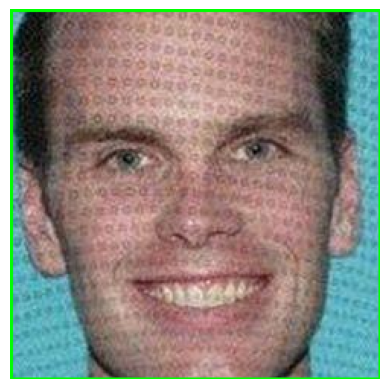

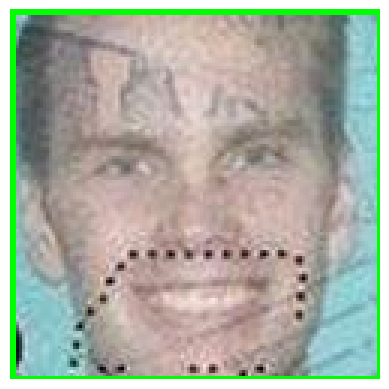

In [6]:
### Step -1 Read Image and Convert to RGB
img = cv2.imread(path[0]) # read image in BGR
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # this step will convert image from BGR to RGB

### Step -2: Apply Haar Cascade Classifier
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
faces_list = haar.detectMultiScale(gray,1.05,31)
print(faces_list)
for x,y,w,h in faces_list:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)
    ### Step -3: crop Face 
    roi = img_rgb[y:y+h,x:x+w]
    
    plt.imshow(roi)
    plt.axis('off')
    plt.show()
    

### Step -4: Save Image


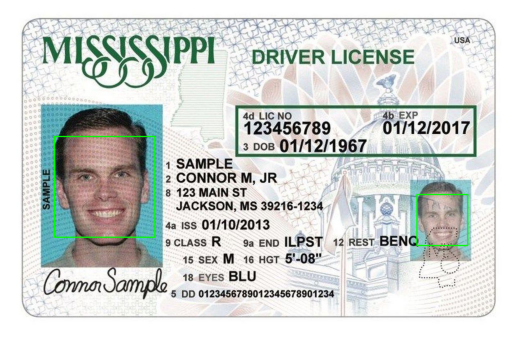

In [7]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [8]:
text_cv = pytesseract.image_to_string(img)
print(text_cv)

FREE A [Toe 2 Se cON

MISSSSPPI DRIVER id <

4d LIC NO
123456789 @ 04/1: 2/201 7

3 vos 01/12/1 967
1 SAMPLE :

2 CONNOR M, JR _
8 123 MAIN ST Wi
JACKSON, MS 39216-1234 ; Pes
4a iss 01/10/2013 : s ?
gcLass R-— 9a END ILPST 12 REST BENQ
15 SEX M 16 HcT 5'-08" f = i

(one 18 EYES BLU
5 DD 0123456789012345678901234




In [12]:
# Define regular expressions to match patterns for Name, State, License Number, and Sex
name_pattern = r"(\b[A-Z]+\s[A-Z]+,\s[A-Z]+\b)"
state_pattern = r"\b([A-Z]+)\b\sDRIVER\sid\s<"
license_pattern = r"LIC\sNO\n(\d+)"
sex_pattern = r"15\sSEX\s([MF])"

# Search for patterns in the OCR result
name_match = re.search(name_pattern, text_cv)
state_match = re.search(state_pattern, text_cv)
license_match = re.search(license_pattern, text_cv)
sex_match = re.search(sex_pattern, text_cv)

# Extract the matched groups
name = name_match.group(1) if name_match else None
state = state_match.group(1) if state_match else None
license_number = license_match.group(1) if license_match else None
sex = sex_match.group(1) if sex_match else None

# Print the extracted information
print("Name:", name)
print("State:", state)
print("License Number:", license_number)
print("Sex:", sex)

Name: CONNOR M, JR
State: MISSSSPPI
License Number: 123456789
Sex: M


In [13]:
# Create a DataFrame with the extracted information
data = {'Name': [name], 'Sex': [sex], 'license_number': [license_number], 'State': [state]}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('extracted_info.csv', index=False)

In [15]:
for i in range(len(path)):
    try:
        ### Step -1 Read Image and Convert to RGB 
        img = cv2.imread(path[i])
        original_image_name = os.path.basename(path[i]).split('.')[0]  # Extract the name without extension
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ### Step - 2: OCR
        text_cv = pytesseract.image_to_string(gray)

        # Extracting Name, Sex, ID Number, and State using regular expressions
        name_pattern = r"(\b[A-Z]+\s[A-Z]+,\s[A-Z]+\b)"
        state_pattern = r"\b([A-Z]+)\b\sDRIVER\sid\s<"
        license_pattern = r"LIC\sNO\n(\d+)"
        sex_pattern = r"15\sSEX\s([MF])"

        # Search for patterns in the OCR result
        name_match = re.search(name_pattern, text_cv)
        state_match = re.search(state_pattern, text_cv)
        license_match = re.search(license_pattern, text_cv)
        sex_match = re.search(sex_pattern, text_cv)

        # Extract the matched groups
        name = name_match.group(1) if name_match else None
        state = state_match.group(1) if state_match else None
        license_number = license_match.group(1) if license_match else None
        sex = sex_match.group(1) if sex_match else None

        '''
        # Print the extracted information
        print("Name:", name)
        print("Sex:", sex)
        print("ID Number:", id_number)
        print("State:", state)
        '''

        #Saving the OCR Data
        # Creating a DataFrame with the extracted information
        data = {'Name': [name], 'Sex': [sex], 'license_number': [license_number], 'State': [state]}
        df = pd.DataFrame(data)

        # Save the DataFrame to a CSV file
        df.to_csv('extracted_info.csv', index=False)

        ### Step - 3: Face detection and cropping
        ###Apply Haar Cascade Classifier 
        
        faces_list = haar.detectMultiScale(gray, 1.5, 1)
        # Process each detected face
        for (x, y, w, h) in faces_list:
            faces_list = sorted(faces_list, key=lambda x: x[2]*x[3], reverse=True)  
            x,y,w,h = faces_list[0]

            ### Crop Face  
            roi = img[y:y+h, x:x+w]
            
            ### Save Image with original image name included
            cv2.imwrite(f'./data/cropped_images/{original_image_name}_Cropped.jpg', roi)
            
        if len(faces_list) == 0:
            print(f'No face detected for:', original_image_name)
            
    except Exception as e:
        print('Error:', e)

In [102]:
# Next Task


'''
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()